In [ ]:
!pip install seaborn

In [ ]:
import plotly.figure_factory as ff
import numpy as N
x = N.random.randn(500)
data = [x]
label = ['DISTPLOT'] 
output = ff.create_distplot(data, label)
output.show()

In [ ]:
import torch
similarities = torch.load('../datasets/embeddings/similarity_result.pt')

In [ ]:
similarities[list(similarities.keys())[0]]

In [ ]:
import plotly.figure_factory as ff
import numpy as N
# x = N.random.randn(500)
# data = [x]
data = []
for key in similarities.keys():
    data.append([similarities[key]])
    for poc in similarities[key]:
        print(len(similarities[key]))
        data.append([similarities[key][poc]])
    break
    
label = ['DISTPLOT'] 
output = ff.create_distplot(data, label)
output.show()

In [ ]:
import plotly.graph_objects as go
import plotly.figure_factory as ff


fig = go.Figure()

pocs = []
values = []
for key in similarities.keys():
    for poc in similarities[key]:
        pocs.append(poc)
        try:
            values.append(similarities[key][poc].item())
        except:
            values.append(similarities[key][poc])
    break




trace1 = go.Scatter(x=pocs, y=values,
                    marker=dict(color='#0099ff'),
                    name='Similarity With Pocs',
                    xaxis='x2', yaxis='y2')


fig.add_traces([trace1])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.xaxis.update({'domain': [0, .5]})
fig.layout.xaxis2.update({'domain': [0.6, 1.]})

# The graph's yaxis MUST BE anchored to the graph's xaxis
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.yaxis2.update({'title': 'Goals'})

# Update the margins to add a title and see graph x-labels.
# fig.layout.margin.update({'t':50, 'b':100})
# fig.layout.update({'title': '2016 Hockey Stats'})

fig.show()

In [ ]:
import plotly.graph_objects as go

import numpy as np

x0 = np.random.randn(2000)
print((x0))
x1 = np.random.randn(2000) + 1
print((x1))
fig = go.Figure()
fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))

# The two histograms are drawn on top of another
fig.update_layout(barmode='stack')
fig.show()

In [ ]:
mapping = {}
i = 1
for key in similarities.keys():
    for poc in similarities[key]:
        mapping[poc] = i
        i += 1
    break

In [ ]:
mapping

In [ ]:
import seaborn
import pandas
import matplotlib.pyplot as plt
seaborn.set(rc={'figure.figsize':(40,10)})
plt.ylim(0,1)
plt.xlim(0, 108)
i = 6
for key in similarities.keys():
    if i == 0:
        break
    i -= 1
    pocs = []
    values = []
    for poc in similarities[key]:
        pocs.append(mapping[poc])
        try:
            values.append(similarities[key][poc].item())
        except:
            values.append(similarities[key][poc])
    res = seaborn.lineplot(x=pocs, y=values, label=key)
    res.set(xticks= pocs)
    
plt.show()



259


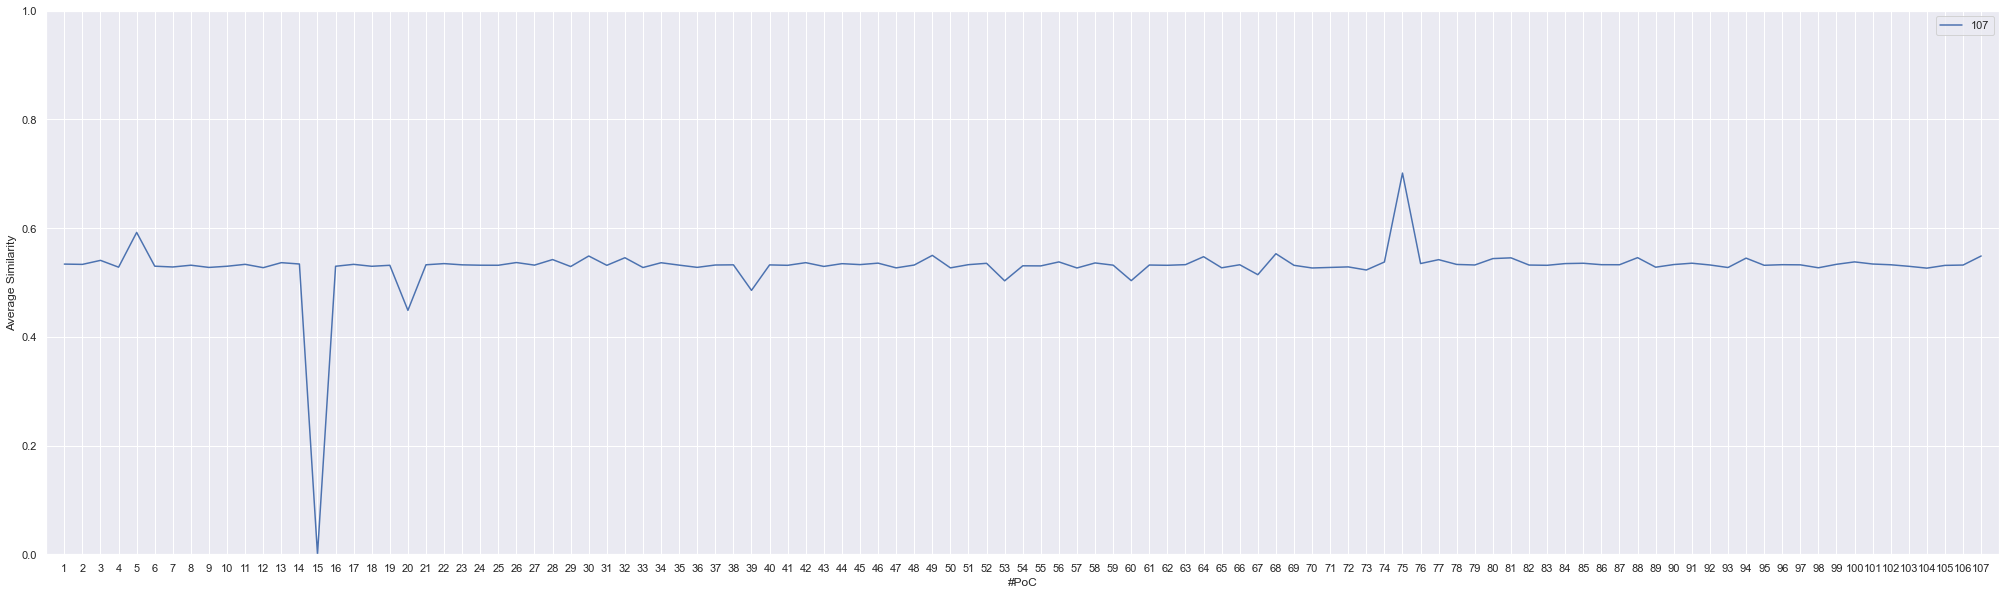

In [112]:
import seaborn
import pandas
import matplotlib.pyplot as plt

# Load similarities
import torch
similarities = torch.load('../datasets/embeddings/similarity_result.pt')

# Create mapping for x-axis labels
mapping = {}
i = 1
for key in similarities.keys():
    for poc in similarities[key]:
        mapping[poc] = i
        i += 1
    break

# Create function to query mapping
def get_poc(n):
    return list(mapping.keys())[n-1]

seaborn.set(rc={'figure.figsize':(35,10)})
plt.ylim(0,1)
plt.xlim(0, 108)
count = 0
acc = {}
for key in similarities.keys():
    pocs = []
    values = []
    for poc in similarities[key]:
        pocs.append(mapping[poc])
        try:
            a = acc[mapping[poc]]
        except:
            acc[mapping[poc]] = 0
        try:
            acc[mapping[poc]] += similarities[key][poc].item()
        except:
            acc[mapping[poc]] += similarities[key][poc]
    count += 1

means = []
for key in acc.keys():
    means.append(acc[key]/count)


res = seaborn.lineplot(x=pocs, y=means, label=key)
res.set(xticks= pocs)
plt.xlabel('#PoC')
plt.ylabel('Average Similarity')
#plt.xticks(rotation=45)
print(count)
plt.show()



16692


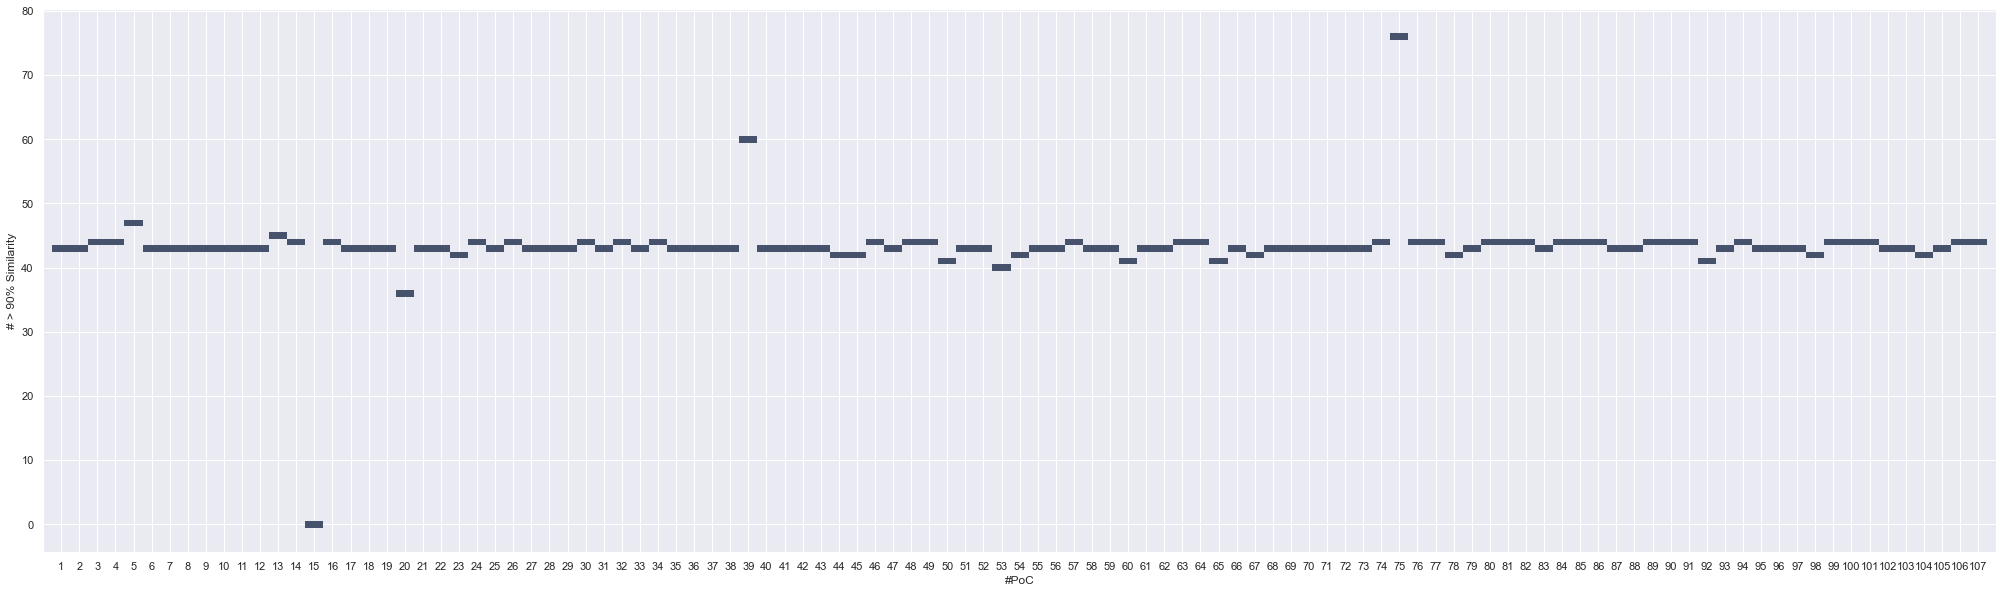

In [104]:
import seaborn
import pandas
import matplotlib.pyplot as plt
import pandas as pd

# Load similarities
import torch
similarities = torch.load('../datasets/embeddings/similarity_result.pt')

# Create mapping for x-axis labels
mapping = {}
i = 1
for key in similarities.keys():
    for poc in similarities[key]:
        mapping[poc] = i
        i += 1
    break

# Create function to query mapping
def get_poc(n):
    return list(mapping.keys())[n-1]

# seaborn.set(rc={'figure.figsize':(35,10)})
# plt.ylim(0,1)
plt.xlim(0, 108)
acc = {}
threshold = 0.8
for key in similarities.keys():
    pocs = []
    values = []
    for poc in similarities[key]:
        pocs.append(mapping[poc])
        try:
            a = acc[mapping[poc]]
        except:
            acc[mapping[poc]] = 0
        try:
            if similarities[key][poc].item() > threshold:
                acc[mapping[poc]] += 1
        except:
            if similarities[key][poc] > threshold:
                acc[mapping[poc]] += 1

means = []
for key in acc.keys():
    means.append(acc[key])

res = seaborn.histplot(data=acc, bins = 107, x = list(acc.keys()), y = list(acc.values()), kde=True, discrete=True)
res.set(xticks= pocs)
plt.xlabel('#PoC')
plt.ylabel('# > 90% Similarity')
#plt.xticks(rotation=45)
print(count)
plt.show()



In [87]:
acc

{1: 21,
 2: 21,
 3: 21,
 4: 21,
 5: 21,
 6: 21,
 7: 21,
 8: 21,
 9: 21,
 10: 21,
 11: 21,
 12: 21,
 13: 22,
 14: 21,
 15: 0,
 16: 21,
 17: 21,
 18: 21,
 19: 21,
 20: 19,
 21: 21,
 22: 21,
 23: 21,
 24: 21,
 25: 21,
 26: 21,
 27: 21,
 28: 21,
 29: 21,
 30: 21,
 31: 21,
 32: 21,
 33: 21,
 34: 21,
 35: 21,
 36: 21,
 37: 21,
 38: 21,
 39: 30,
 40: 21,
 41: 21,
 42: 21,
 43: 21,
 44: 21,
 45: 21,
 46: 21,
 47: 21,
 48: 21,
 49: 21,
 50: 21,
 51: 21,
 52: 21,
 53: 21,
 54: 21,
 55: 21,
 56: 21,
 57: 21,
 58: 21,
 59: 21,
 60: 21,
 61: 21,
 62: 21,
 63: 21,
 64: 21,
 65: 21,
 66: 21,
 67: 21,
 68: 21,
 69: 21,
 70: 21,
 71: 21,
 72: 21,
 73: 21,
 74: 22,
 75: 39,
 76: 21,
 77: 21,
 78: 21,
 79: 21,
 80: 21,
 81: 21,
 82: 21,
 83: 21,
 84: 22,
 85: 21,
 86: 21,
 87: 21,
 88: 21,
 89: 21,
 90: 21,
 91: 21,
 92: 21,
 93: 21,
 94: 21,
 95: 21,
 96: 21,
 97: 21,
 98: 21,
 99: 21,
 100: 21,
 101: 21,
 102: 21,
 103: 21,
 104: 21,
 105: 21,
 106: 21,
 107: 21}

In [65]:
def get_poc(n):
    return list(mapping.keys())[n-1]

In [90]:
get_poc(75)

'4403_CVE-2007-4911'